In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url_client_prof = 'https://raw.githubusercontent.com/data-bootcamp-v4/lessons/refs/heads/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_demo.txt'

url_dig_fprint_1 = 'https://raw.githubusercontent.com/data-bootcamp-v4/lessons/refs/heads/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_web_data_pt_1.txt'

url_dig_fprint_2 = 'https://raw.githubusercontent.com/data-bootcamp-v4/lessons/refs/heads/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_web_data_pt_2.txt'

url_exp_rost = 'https://raw.githubusercontent.com/data-bootcamp-v4/lessons/refs/heads/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_experiment_clients.txt'

In [4]:
# DF client profiles
client_prof = pd.read_csv(url_client_prof)

# DF digital Footprints merge
digital_fprint_1 = pd.read_csv(url_dig_fprint_1)
digital_fprint_2 = pd.read_csv(url_dig_fprint_2)
digital_fprint = pd.concat([digital_fprint_1, digital_fprint_2], axis = 0)


# DF Experiment Roster
experiment_roster = pd.read_csv(url_exp_rost)

In [5]:
# checking for nULL values - no null values found !!!
client_prof.isnull()

# cheking for duplicates - no duplicates found!!!
client_prof.duplicated().sum()

# checking dattype of each column
client_prof.dtypes

client_id             int64
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age            float64
gendr                object
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
dtype: object

In [6]:
# Understanding groups of clients by there logon activity.

client_prof['logons_6_mnth'].value_counts()

logons_6_mnth
9.0    12350
3.0    10243
4.0    10220
7.0     9893
5.0     9254
6.0     7878
8.0     4810
2.0     3009
1.0     2938
Name: count, dtype: int64

In [7]:
# Creating group of logon data by client. This can give us anderstanding of how often cliens logon for there acounts. We can filter clients 
# that logon more often it means use the aplication more often.

logon_tables = {}
for logon in client_prof['logons_6_mnth'].unique():
    logon_tables[logon] = client_prof[client_prof['logons_6_mnth'] ==logon]


logon_group_9 = logon_tables[9]
logon_group_9

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
9,8198645,15.0,189.0,54.5,F,2.0,382303.83,6.0,9.0
11,2537139,8.0,99.0,51.5,U,2.0,135940.68,6.0,9.0
...,...,...,...,...,...,...,...,...,...
50485,3823121,14.0,178.0,68.5,F,2.0,32666.22,6.0,9.0
50489,6751438,8.0,98.0,49.5,U,2.0,416988.75,6.0,9.0
50493,9932367,23.0,280.0,57.0,F,2.0,94466.55,6.0,9.0
50495,1780858,21.0,262.0,68.5,M,3.0,372100.59,6.0,9.0


In [8]:
# Analysis of client engagement based on there tenure and age.

In [9]:
logon_group_9['clnt_tenure_yr'].describe()

count    12350.000000
mean        12.344211
std          7.253581
min          2.000000
25%          6.000000
50%         11.000000
75%         16.000000
max         55.000000
Name: clnt_tenure_yr, dtype: float64

In [10]:
mode = logon_group_9['clnt_tenure_yr'].mode()[0]
med = logon_group_9['clnt_tenure_yr'].median()
mean = logon_group_9['clnt_tenure_yr'].mean()

print(mode)
print(med)
print(mean)

6.0
11.0
12.34421052631579


In [11]:
variance_yr = logon_group_9['clnt_tenure_yr'].var()
std_dev_yr = logon_group_9['clnt_tenure_yr'].std()
min_yr = logon_group_9['clnt_tenure_yr'].min()
max_yr = logon_group_9['clnt_tenure_yr'].max()
range_yr = max_yr - min_yr
q_yr = logon_group_9['clnt_tenure_yr'].quantile([0.25, 0.5, 0.75])

print(variance_yr)
print(std_dev_yr)
print(range_yr)
print(q_yr)

52.61444336000003
7.253581416100603
53.0
0.25     6.0
0.50    11.0
0.75    16.0
Name: clnt_tenure_yr, dtype: float64


<Axes: ylabel='clnt_tenure_yr'>

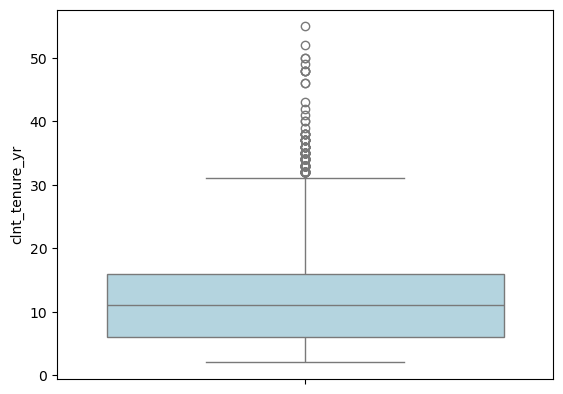

In [12]:
sns.boxplot(data = logon_group_9['clnt_tenure_yr'], color="lightblue")

In [13]:
top_logon_threshold = client_prof['logons_6_mnth'].quantile(0.75)  # Example: Top 25% logon frequency
primary_clients = client_prof[client_prof['logons_6_mnth'] >= top_logon_threshold]

primary_clients

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
9,8198645,15.0,189.0,54.5,F,2.0,382303.83,6.0,9.0
11,2537139,8.0,99.0,51.5,U,2.0,135940.68,6.0,9.0
...,...,...,...,...,...,...,...,...,...
70575,8650568,11.0,135.0,26.0,M,3.0,81293.54,7.0,7.0
70577,4324637,9.0,108.0,37.0,M,2.0,60768.46,7.0,7.0
70581,2184810,23.0,286.0,75.5,M,4.0,2496314.67,7.0,7.0
70586,8057076,10.0,120.0,24.5,F,2.0,68218.85,7.0,7.0


In [14]:
#KPI

In [15]:
# For calculating KPI we will focus on 2 tables FootPrints and Rooster clients

In [16]:
# Checking for null values in both tables
digital_fprint
digital_fprint.isnull().sum()


client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

In [17]:
# Delitting rows with null values in Rooster table. According to the logic it will not affect the further analysis.
experiment_roster.isnull().sum()
experiment_roster = experiment_roster.dropna()

In [18]:
# Merging 2 tables together on client_id so to enreach the Foot print tables with information with client was in wich groop (control or test)
new_table = pd.merge(digital_fprint, experiment_roster, on = 'client_id', how = 'inner')

In [26]:
# Spliting for 2 tables 2 groops Test groop and Control groop

var_tables = {}
for var in new_table['Variation'].unique():
    var_tables[var] = new_table[new_table['Variation'] ==var]


test_table = var_tables['Test']
control_table = var_tables['Control']

In [20]:
# 1.KPI # Completion Rate - how many users reached the final step - CONFIRM The proportion of users who reach the final 'confirm' step.


In [44]:
# For Contral groop:
# 1. calculate the nulber of clients with 'start' process step
# 2. calculate number of clients with 'confirm' process step
# 3. Divide number of clients with CONFIRM status on clienys with START status - Completion Rate

total_client_start_c = control_table[control_table['process_step']== 'start']['client_id'].nunique()
total_client_confirm_c = control_table[control_table['process_step']== 'confirm']['client_id'].nunique()

completion_rate_control = total_client_confirm_c/total_client_start_c

completion_rate_control = completion_rate_control*100

completion_rate_control

65.96572210112409

In [45]:
# For Test groop:

total_client_start_t = test_table[test_table['process_step']== 'start']['client_id'].nunique()
total_client_confirm_t = test_table[test_table['process_step']== 'confirm']['client_id'].nunique()

completion_rate_test = total_client_confirm_t/total_client_start_t

completion_rate_test = completion_rate_test*100

completion_rate_test

70.0438547171933

In [ ]:
# Completation Rate : Control groop - 66% clients , Test groop - 70% clients

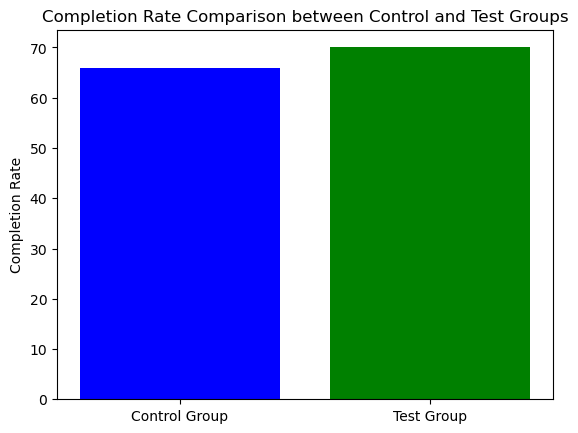

In [ ]:
# Create a bar chart
labels = ['Control Group', 'Test Group']
completion_rates = [completion_rate_control, completion_rate_test]

plt.bar(labels, completion_rates, color=['blue', 'green'])
plt.ylabel('Completion Rate')
plt.title('Completion Rate Comparison between Control and Test Groups')

plt.show()

In [ ]:
# Error Rates - Error Rates: If there's a step where users go back to a previous step, it may indicate confusion or an error.
#  You should consider moving from a later step to an earlier one as an error.

In [66]:
# For test table
# Counting how many steps made each client_id

steps_per_client_t = test_table.groupby('client_id')['process_step'].count().reset_index()

# Condition if theer were more then 5 steps it is shows error

steps_per_client_t ['error_flag'] = steps_per_client_t['process_step'] > 5
error_client_t = steps_per_client_t[steps_per_client_t['error_flag']]

# Counting exect amount of errors 
count_error_t = error_client_t['error_flag'].count()

count_id_t = steps_per_client_t['client_id'].count()

In [50]:
# For contral table
# Counting how many steps made each client_id

steps_per_client_c = control_table.groupby('client_id')['process_step'].count().reset_index()

# Condition if theer were more then 5 steps it is shows error

steps_per_client_c ['error_flag'] = steps_per_client_c['process_step'] > 5
error_client_c = steps_per_client_c[steps_per_client_c['error_flag']]

# Counting exect amount of errors 
count_error_c = error_client_c['error_flag'].count()

count_id_c = steps_per_client_c['client_id'].count()

error_rate_c = count_error_c/count_id_c
error_rate_c = error_rate_c*100

error_rate_c

42.69080401155873

In [ ]:
# Count steps and identify errors in a more compact form
# Group by client_id and count steps
# Directly flag errors where count is greater than 5
 # Calculate the mean to get the proportion of clients with errors, then convert to percentage

error_rate_c = (control_table.groupby('client_id')['process_step'].count().gt(5).mean() * 100 )

error_rate_c

42.69080401155873

In [52]:
# For test table

error_rate_t = (test_table.groupby('client_id')['process_step'].count().gt(5).mean() * 100 )

error_rate_t

47.66018985464254

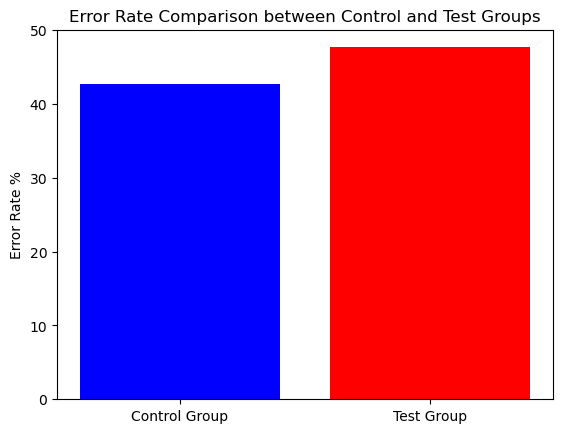

In [55]:
# Create a bar chart
labels = ['Control Group', 'Test Group']
error_rates = [error_rate_c, error_rate_t]

plt.bar(labels, error_rates, color=['blue', 'red'])
plt.ylabel('Error Rate %')
plt.title('Error Rate Comparison between Control and Test Groups')

plt.show()

In [62]:
error_rates = pd.Series([error_rate_c, error_rate_t], index=['Control Group', 'Test Group'])

Text(0.5, 1.0, 'Error Rate between Control and Test Groups')

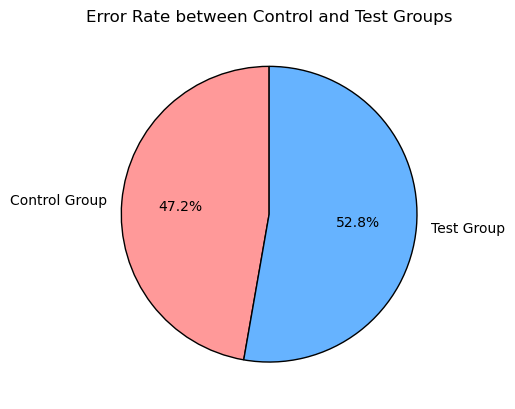

In [65]:
error_rates.plot.pie(autopct='%1.1f%%', 
                     startangle=90, 
                     colors=['#ff9999', '#66b3ff'],
                     labels = error_rates.index, 
                     wedgeprops={'edgecolor': 'black'} )
plt.title('Error Rate between Control and Test Groups')

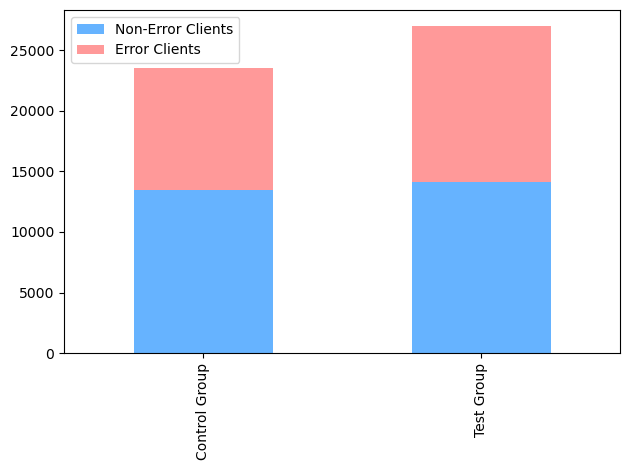

In [71]:
# Control group data
total_clients_control = count_id_c  # Total clients in control group
error_clients_control = count_error_c  # Error clients in control group
non_error_clients_control = total_clients_control - error_clients_control

# Test group data
total_clients_test = count_id_t  # Total clients in test group
error_clients_test = count_error_t  # Error clients in test group
non_error_clients_test = total_clients_test - error_clients_test

# Prepare data for the stacked bar chart
data = {
    'Non-Error Clients': [non_error_clients_control, non_error_clients_test],
    'Error Clients': [error_clients_control, error_clients_test]
}
groups = ['Control Group', 'Test Group']

# Create a DataFrame
df = pd.DataFrame(data, index=groups)

# Plotting the stacked bar chart
df.plot(kind='bar', stacked=True, color=['#66b3ff', '#ff9999'])

# Adding labels and title
ax.set_ylabel('Number of Clients')
ax.set_title('Proportion of Error Clients within Total Clients for Each Group')
ax.axhline(0, color='black', lw=0.8)

# Add legend
ax.legend(['Non-Error Clients', 'Error Clients'])

# Show the plot
plt.tight_layout()
plt.show()